In [1]:
 pip install fastai --upgrade

     |████████████████████████████████| 194kB 8.9MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [47]:
# Certain utils

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *


     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 1.2MB 53.5MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastai import *
from fastai.vision.all import *

# Pixel Similarity 

Find the average pixel value for every pixel of the `3s` then do the same for the `7s` . This will give us two group average's defining what we might call the **ideal** `3` and `7` . 

Then to classify an image as one digit or the another we see which of these two ideal digits the image is most similar to.

In [3]:
# Already done these all before 

path = untar_data(URLs.MNIST_SAMPLE)

threes = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train' / '7').ls().sorted()

len(sevens) , len(threes)

(6265, 6131)

In [4]:
# Stacking all the images in the directory, and converting into tensors

seven_tensor = [tensor(Image.open(o)) for o in sevens]
three_tensor = [tensor(Image.open(o)) for o in threes]


In [5]:
# Checking the shape of the tensor

len(seven_tensor) , len(three_tensor)

(6265, 6131)

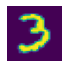

In [6]:
# Printing out a image 

show_image(three_tensor[4]) # Show image is fastai's function

We want to compute the average over all the images of the intensity of the pixel. 

In Pytorch, such as taking a mean require us to cast our integer to types of float. So we gotta cast our stacked tensor to float now.

In [7]:
# Casting our integer type to float 

stacked_sevens = torch.stack(seven_tensor).float() / 255
stacked_threes = torch.stack(three_tensor).float() / 255

stacked_sevens.shape , stacked_threes.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In above the `.shape` tells us that stacked_sevens has 6252 images, each size of *28x28* pixels. 


In [8]:
# Length of tensor's shape is its rank 

len(stacked_threes.shape) , len(stacked_sevens.shape) # both are rank 3 tensors

(3, 3)

In [9]:
# Also using ndim we can get the rank 

stacked_sevens.ndim

3

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdef3178438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdef2c2fef0>)

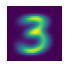

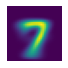

In [10]:
# The Mean 3, which we computed by taking the mean along dimensions 0 of our staced tensor

mean3 = stacked_threes.mean(0) # divided by 0th dimension
mean7 = stacked_sevens.mean(0)

# Display
show_image(mean3) , show_image(mean7)

In [11]:
stacked_threes.mean(0)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04,
         2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04, 2.9423e-04, 2.840

### Trying both L1 and L2 norm

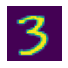

In [12]:
# Sample 3, one img of a stacked three 

a_3 = stacked_threes[1] 
show_image(a_3) # Now gotta calculate this with average 3 we created

In [13]:
# This is the L1 norm or mean of the absolute value of differences

dist_3_abs = (a_3 - mean3).abs().mean() # replace -ve with +ve

# This is the L2 norm, root mean squared error (RMSE)
dist_3_sqrt = ((a_3 - mean3)**2).mean().sqrt()

# Printing both 
print(f'This the distance calculated from mean3 to single 3 using L1 norm: {dist_3_abs}')
print(f'This the distance calculated from mean3 to single 3 using L2 norm: {dist_3_sqrt}')

This the distance calculated from mean3 to single 3 using L1 norm: 0.11143654584884644
This the distance calculated from mean3 to single 3 using L2 norm: 0.20208320021629333


In [14]:
# Calculating the same for 7 

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqrt = ((a_3 - mean7)**2).mean().sqrt()

dist_7_abs , dist_7_sqrt 

(tensor(0.1586), tensor(0.3021))

# From Array's to Pytorch Tensors 

Here we will dig deep into Pytorch itself, unfolding the functionality of Pytorch and tidbits which we can use on fastai to ease our process. 

In [15]:
# Creating a numpy array and pytorch tensor

data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)


print(f'This is the numpy array: {arr} and the type {type(arr)}')
print(f'This is a Pytorch Tensor: {tns} and the type {type(tns)}')

This is the numpy array: [[1 2 3]
 [4 5 6]] and the type <class 'numpy.ndarray'>
This is a Pytorch Tensor: tensor([[1, 2, 3],
        [4, 5, 6]]) and the type <class 'torch.Tensor'>


## Operation on Tensor

In [16]:
# Indexing a tensor 

print(tns[1])
print(tns[0:2])

tensor([4, 5, 6])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [17]:
# Indexing just the coloumn using [: , num]

tns[: , 2] , tns[: , 1]

(tensor([3, 6]), tensor([2, 5]))

In [18]:
# With start and end indexing [start : end ] or slicing

tns[0 , 0:1] , tns[1 , 0:3]

(tensor([1]), tensor([4, 5, 6]))

In [19]:
# Using Standard operations 

print(tns + 1)

print(tns * 4)

tensor([[2, 3, 4],
        [5, 6, 7]])
tensor([[ 4,  8, 12],
        [16, 20, 24]])


In [20]:
# Checking the type of a tensor 

tns.type()

'torch.LongTensor'

## The Idea of Broadcasting and computing with it. 


For now we want to calculate the **metric** over our **validation set.** Well this is because to avoid overfitting. Since we dont have a dedicated valid set here we are going to take a part of our training data and use it for validation set.

Below cells will work on creating a validation set and introduce to the concept of broadcasting. 

In [21]:
# Creating valid 3 and 7 tensors 

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in 
                            (path / 'valid' /'3').ls()])

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in 
                            (path/'valid'/'7').ls()])

# Putitng them into 0 and 1 

valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255


print(f'The shape of valid 3 tensor{valid_3_tens.shape}')
print(f'The shape of valid 7 tensor{valid_7_tens.shape}')

The shape of valid 3 tensortorch.Size([1010, 28, 28])
The shape of valid 7 tensortorch.Size([1028, 28, 28])


Now having those validation set, we gotta write a function kinda `is_3` that will decide if an arbitrary image is 3 or 7. It will decide by which of these two **ideal digits (3 or 7)** closer to the arbitrary value. 

For that we need to define a notion of distance, which means a function which calculates distance between two images. 


I raised a thread why we use `(-1,-2)` with the mean. Here it got answered 

https://forums.fast.ai/t/understanding-mean-1-2-in-mnist-distance/84430/4

In [22]:
# Writing the function which cal dist btw ideal and arbitrary value

def mnist_distance(a, b):
  return (a-b).abs().mean((-1 , -2))

# Passing in ideal and arbitrary 

mnist_distance(a_3 , mean3)

tensor(0.1114)

#### Decoding mnist_distance for understanding

In [23]:
ab = (a_3 - mean3).abs()
print(ab[:2])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])


In [24]:
ab.mean()

tensor(0.1114)

In [25]:
ab.mean((-1 , -2))

tensor(0.1114)


#### With the power of Broadcasting calculating for all tensors in the validation set. 

In [26]:
valid_3_dist = mnist_distance(valid_3_tens , mean3)


print(f'The shape of distance calculated : {valid_3_dist.shape}')

The shape of distance calculated : torch.Size([1010])


In [27]:
# It has every distance for 1011 images, and stacked into a tensor.

valid_3_dist

tensor([0.1328, 0.1288, 0.1230,  ..., 0.1168, 0.1132, 0.1344])

In [28]:
# After broadcasting the two argument tensors have the same rank. 

test_rank = tensor([1,2,4]) + tensor([1,24,5] , 
                         [1,234,2])

test_rank.ndim # Before it was 1 and 2 now after broadcasting became 2

2

In [29]:
valid_3_tens.shape , a_3.shape # It will broadcast to the large rank

(torch.Size([1010, 28, 28]), torch.Size([28, 28]))

In [30]:
# Talking about axes 

valid_3_tens.ndim

3

By using `mnist_distance` we can figure out wheter an image is a 3 by using the following logic: 

* If the distance between digit in question and ideal `3` is less than the distance to the ideal `7`, then its a `3`. 

The below function will automatically use broadcasting. 

In [31]:
mean3.ndim , mean3.shape

(2, torch.Size([28, 28]))

In [32]:
## Function to check whether its 3 or not 

def is_3(x):
  return mnist_distance(x , mean3) < mnist_distance(x , mean7)

In [33]:
# Testing the function we made above 

is_3(valid_3_tens[0]) , is_3(a_3).float() # True means its a 3

(tensor(True), tensor(1.))

In [34]:
# Testing 7 

a_7 = stacked_sevens[3]

is_3(a_7) , is_3(a_7).float() # If its false then it means a 7

(tensor(False), tensor(0.))

In [35]:
# Decoding the above function, ima idiot was checking with a_7 shit

mnist_distance(a_3 , mean3) , mnist_distance(a_3 , mean7)

(tensor(0.1114), tensor(0.1586))

In [36]:
mnist_distance(a_3 , mean3) <  mnist_distance(a_3 , mean7)

tensor(True)

**By Broadcasting, testing our `is_3` function on the whole sets**

In [37]:
is_3(valid_3_tens) # We will get a list of boolean

tensor([True, True, True,  ..., True, True, True])

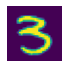

In [38]:
# The reason for false, our model couldnt infer it properly

show_image(valid_3_tens[0])

### Calculating Accuracy 

Here we are calculating accuracy, for each of the `3s` and `7s` by taking the average of that function. For all the `3s` and inverse for all the `7s`.

This will be how accurate our function `is_3()` able to detect whether its 3 or 7.  

In [39]:
# For 3
accuracy_3s = is_3(valid_3_tens).float().mean() # We use mean to take average

# For 7, will take inverse of all the 7s 
accuracy_7s = (1 - is_3(valid_7_tens).float().mean())

In [40]:
print(f'The accuracy of all the 3s: {accuracy_3s}')  
print(f'The accuracy of all the 7s: {accuracy_7s}')
print(f'On combined how much our is_3() able to detect accurately: {(accuracy_3s + accuracy_7s) / 2}')

The accuracy of all the 3s: 0.9168316721916199
The accuracy of all the 7s: 0.9854085445404053
On combined how much our is_3() able to detect accurately: 0.951120138168335


# Stochastic Gradient Descent (SGD)

This is something which will allows our model to get better and better which can learn. In pixel similarity approach we don't have,

- any kind of weight assignment
- any way of improving based on testing the effectiveness of a weight assignment.

In a nut shell we can't improve our pixel similarity approach by modifying a set of parameters.

In [41]:
# Representing 3 in a df 


im3_path = threes[1]
im3 = Image.open(im3_path)
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font_size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [42]:
# Representing 7 in a df 


im7_path = sevens[2]
im7 = Image.open(im7_path)
im7_t = tensor(im7)
df = pd.DataFrame(im7_t)
df.style.set_properties(**{'font_size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,13,135,147,147,147,147,147,147,122,39,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,185,185,185,207,254,254,254,254,254,254,254,254,254,43,0,0,0,0,0,0,0,0
8,0,0,0,0,0,253,254,254,254,253,198,140,140,140,140,140,196,253,254,119,0,0,0,0,0,0,0,0
9,0,0,0,0,0,128,254,233,103,70,0,0,0,0,0,0,4,183,254,101,0,0,0,0,0,0,0,0


Instead we could look at each individual pixel and come up with a set of weights for each, such that the highest weights are associated with those pixels most likely to be black for a particular category.

For instance, pixel toward the bottom right are not very likely to be activated for a 7, so 7 will have a low weight. But they are activated for 8, so now 8 would have high weight.

In [43]:
# Probability of number being 8 

def pr_eight(x , w):
  '''
  x --> input image
  w --> weights
  '''
  return (x*w).sum()

### Sequence of steps

- **Initialize**

    We initialize the parameters (or) weights to random values at first. It's believed starting with random weights (or) values works perfectly well. 

- **Loss**

    A function will return a number that is small when the performance of the model is good. The standard approach is to treat a **small loss as a god and large loss as bad.** 

- **Step**

    A simple way to figure out whether a weight should be increased a bit or decreased, would be just try to increase the weight by a small amount and observe the loss goes up or down. We do this increment and decrement until we find an amount that satisfy us. 

    However, we use calculus to take care of this. Finding which direction and roughly how much, to change each weight without doing those adjustments above. 

    We do this by calculating ***gradients.*** This is just an **performance optimization.** 

- **Stop**

    This is the phase where we choose the epochs to train the model for, we would keep training until the accuracy of the model started getting worse or ran out of time. 

    Before jumping into the whole method, will focus on applying them on simple steps for our digit classifier.


Creating a simple quadratic function, pretending this as our loss function 
`x` --> weight param 

In [44]:
# simple loss function 

def f(x):
  return x**2

/usr/local/lib/python3.6/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


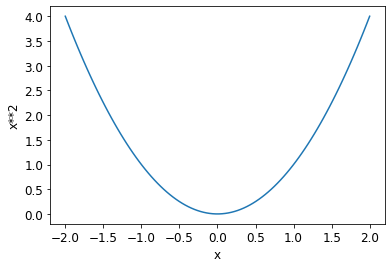

In [48]:
# plotting the graph of the function

plot_function(f , 'x' , 'x**2')

Now the next step would be as per the steps or guide we described, 

- Pick a random value from that graph
- Calculate loss for that value

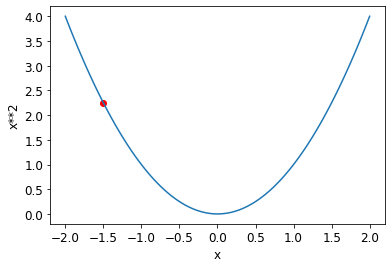

In [50]:
# Picking up a random value 

plot_function(f , 'x' , 'x**2')
plt.scatter(-1.5 , f(-1.5), color='red');

Now we will observe what would happen if we increase or decrease our parameters (or values) by adjusting them towards the slope at a particular point. 
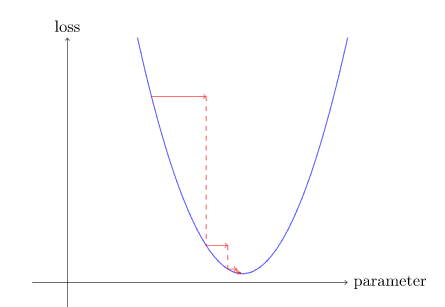

## The Magic Step - Calculating Gradients

As mentioned above we use **calculus** as a performance optimization, it will help us quickly to calculate whether our loss will go up or down when we adjust the parameters up or down. 

In simple words **gradients will tell us how much we have to change each weight to make our model better.** 

**What is derivative?**

For any quadratic function we can calculate its derivatives. The derivative is another function, it calculates the change rather than the value. 

For instance, the derivative of the quad function at the value 3 tells us how rapidly the function changes at the value 3. 

More appropriate definition would be, 

Gradient is defined as rise/run that is the change in the value of the function, divided by the change in the value of the parameter. 

The idea here is when we know how our function will change, we know what we need to do to make it smaller. 

The key in ML is having a way to change the parameter of a function to make it smaller.

#### **Calculating Gradients with Pytorch** 

In [52]:
import torch

In [51]:
# A tensor, in this value we need gradients 

xt = tensor(3.).requires_grad_()

In [53]:
# making calculating with that value (xt)

yt = f(xt) # x**2 --> 2x --> 2(xt) --> 2(3) --> 6 (gradient)
yt

tensor(9., grad_fn=<PowBackward0>)

In [54]:
# Telling Pytorch to calculate gradients for us 

yt.backward()  # refers to backpropagation

In [55]:
# Viewing the gradients 

xt.grad

tensor(6.)

In [57]:
# Same steps but with an Vector Argument 

xt = tensor([3. , 4. , 5.]).requires_grad_()
xt

tensor([3., 4., 5.], requires_grad=True)

In [58]:
# Adding sum to the function --> so it can return a scalar 

def f(x):
  return (x**2).sum()

yt = f(xt) 

tensor(50., grad_fn=<SumBackward0>)

In [60]:
# Gradients --> 2*xt for every value it applies and sums up

yt.backward()
xt.grad

tensor([ 6.,  8., 10.])

The gradients will tell us only the slope of our function, they don't tell us exactly how far to adjust the parameters. 

If slope is very large —> More adjustments to do 

If slope is very small —> we are close to the optimal value.